In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Kraus, SuperOp, random_quantum_channel, PTM, Choi, Chi
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [2]:
rqc = PTM(random_quantum_channel(2, 2))
print('num_qubits: ', rqc.num_qubits)
rqc

num_qubits:  1


PTM([[ 1.00000000e+00-1.62043135e-18j, -6.93889390e-18+3.46944695e-18j,
       3.12250226e-17+0.00000000e+00j,  0.00000000e+00-8.89628970e-18j],
     [ 1.88065483e-01-5.20417043e-18j, -1.15362942e-01+0.00000000e+00j,
       1.53380269e-01+0.00000000e+00j, -2.06477978e-01+5.20417043e-18j],
     [-1.25508465e-01+0.00000000e+00j, -4.57155516e-01+0.00000000e+00j,
      -4.50234153e-01+0.00000000e+00j, -1.37733808e-01+0.00000000e+00j],
     [ 1.09459698e-01+5.72149298e-18j, -6.41517365e-02+0.00000000e+00j,
      -1.15933560e-01+0.00000000e+00j,  1.89603009e-01+1.18999014e-19j]],
    input_dims=(2,), output_dims=(2,))

In [3]:
rqc.compose(rqc)

PTM([[ 1.00000000e+00-3.56216466e-18j, -2.04130940e-17+3.63991378e-18j,
       1.61021616e-17+1.56352324e-18j, -2.86801248e-18-1.12994174e-17j],
     [ 1.24518157e-01-5.52026460e-18j, -4.35641068e-02+3.18626648e-19j,
      -6.28137076e-02-6.03338005e-19j, -3.64545873e-02-1.31129774e-18j],
     [-1.70051742e-01+1.79445005e-18j,  2.67401695e-01-4.35444962e-19j,
       1.48560127e-01+0.00000000e+00j,  1.30290266e-01-1.27894574e-18j],
     [ 1.32699502e-01+6.97581550e-18j,  4.82370373e-02+3.72130623e-19j,
       2.03762858e-02-1.37959793e-20j,  6.51631925e-02-1.26251661e-18j]],
    input_dims=(2,), output_dims=(2,))

In [4]:
rqc.power(4)
rqc.adjoint()
rqc.is_unitary()
rqc.is_cptp() # cp, tp, unitary

True

In [5]:
from qiskit.quantum_info import Kraus
rqc_kraus = Kraus(random_quantum_channel(2, 2))
rqc_kraus

Kraus([[[ 0.16510025+0.12138173j, -0.38686969+0.10334354j],
        [ 0.18967791+0.08547223j, -0.24605432+0.14991361j]],

       [[-0.09578052+0.26031781j,  0.56404581+0.18198139j],
        [ 0.18858765+0.45824502j,  0.18618338+0.23237352j]],

       [[ 0.26550027+0.11849789j,  0.03895017+0.30938416j],
        [ 0.13478559-0.24814475j, -0.24065174-0.19046563j]],

       [[-0.50043097-0.34562591j,  0.1331936 -0.08831569j],
        [-0.19262152+0.14479469j,  0.22561661-0.22099635j]]],
      input_dims=(2,), output_dims=(2,))

In [6]:
# Construct a 1-qubit bit-flip and phase-flip errors
p_error = 0.05
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
print(bit_flip)
print(phase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [7]:
# Compose two bit-flip and phase-flip errors
bitphase_flip = bit_flip.compose(phase_flip)
print(bitphase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘
  P(1) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ I ├
   └───┘└───┘
  P(2) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ Z ├
   └───┘└───┘
  P(3) = 0.9025, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ I ├
   └───┘└───┘


In [8]:
# Tensor product two bit-flip and phase-flip errors with
# bit-flip on qubit-0, phase-flip on qubit-1
error2 = phase_flip.tensor(bit_flip)
print(error2)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(1) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ Z ├
     └───┘
  P(2) = 0.0475, Circuit = 
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ I ├
     └───┘
  P(3) = 0.9025, Circuit = 
     ┌───┐
q_0: ┤ I ├
     ├───┤
q_1: ┤ I ├
     └───┘


In [9]:
# Convert to Kraus operator
bit_flip_kraus = Kraus(bit_flip)
print(bit_flip_kraus)

Kraus([[[ 9.74679434e-01+0.j,  0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j,  9.74679434e-01+0.j]],

       [[ 0.00000000e+00+0.j,  2.23606798e-01+0.j],
        [ 2.23606798e-01+0.j, -4.96506831e-17+0.j]]],
      input_dims=(2,), output_dims=(2,))


In [10]:
# Convert to Superoperator
phase_flip_sop = SuperOp(phase_flip)
print(phase_flip_sop)

SuperOp([[1. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0.9+0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0.9+0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0. +0.j, 1. +0.j]],
        input_dims=(2,), output_dims=(2,))


In [11]:
# Convert back to a quantum error
print(QuantumError(bit_flip_kraus))
 
# Check conversion is equivalent to original error
QuantumError(bit_flip_kraus) == bit_flip

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───────┐
q: ┤ kraus ├
   └───────┘


True

In [12]:
# Measurement misassignment probabilities
p0given1 = 0.1
p1given0 = 0.05
 
ReadoutError([[1 - p1given0, p1given0], [p0given1, 1 - p0given1]])

ReadoutError([[0.95 0.05]
 [0.1  0.9 ]])

In [13]:
# System Specification
n_qubits = 4
circ = QuantumCircuit(n_qubits)
 
# Test Circuit
circ.h(0)
for qubit in range(n_qubits - 1):
    circ.cx(qubit, qubit + 1)
circ.measure_all()
print(circ)

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■─────────────░─┤M├─────────
        └───┘┌─┴─┐           ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──■────────░──╫─┤M├──────
             └───┘┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──■───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


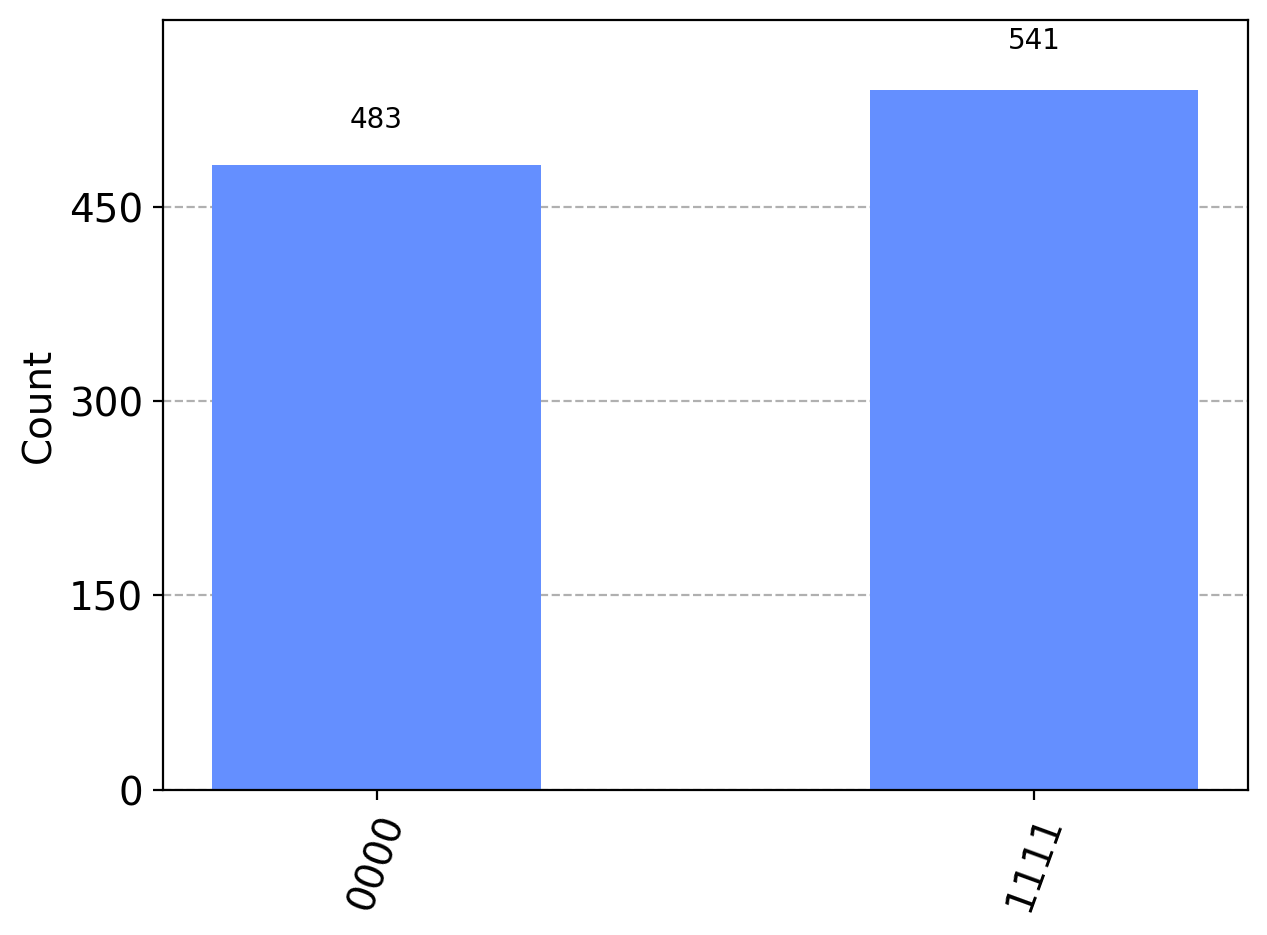

In [14]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [15]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
 
# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)
 
# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
 
print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'reset', 'u3', 'measure', 'u1', 'cx']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


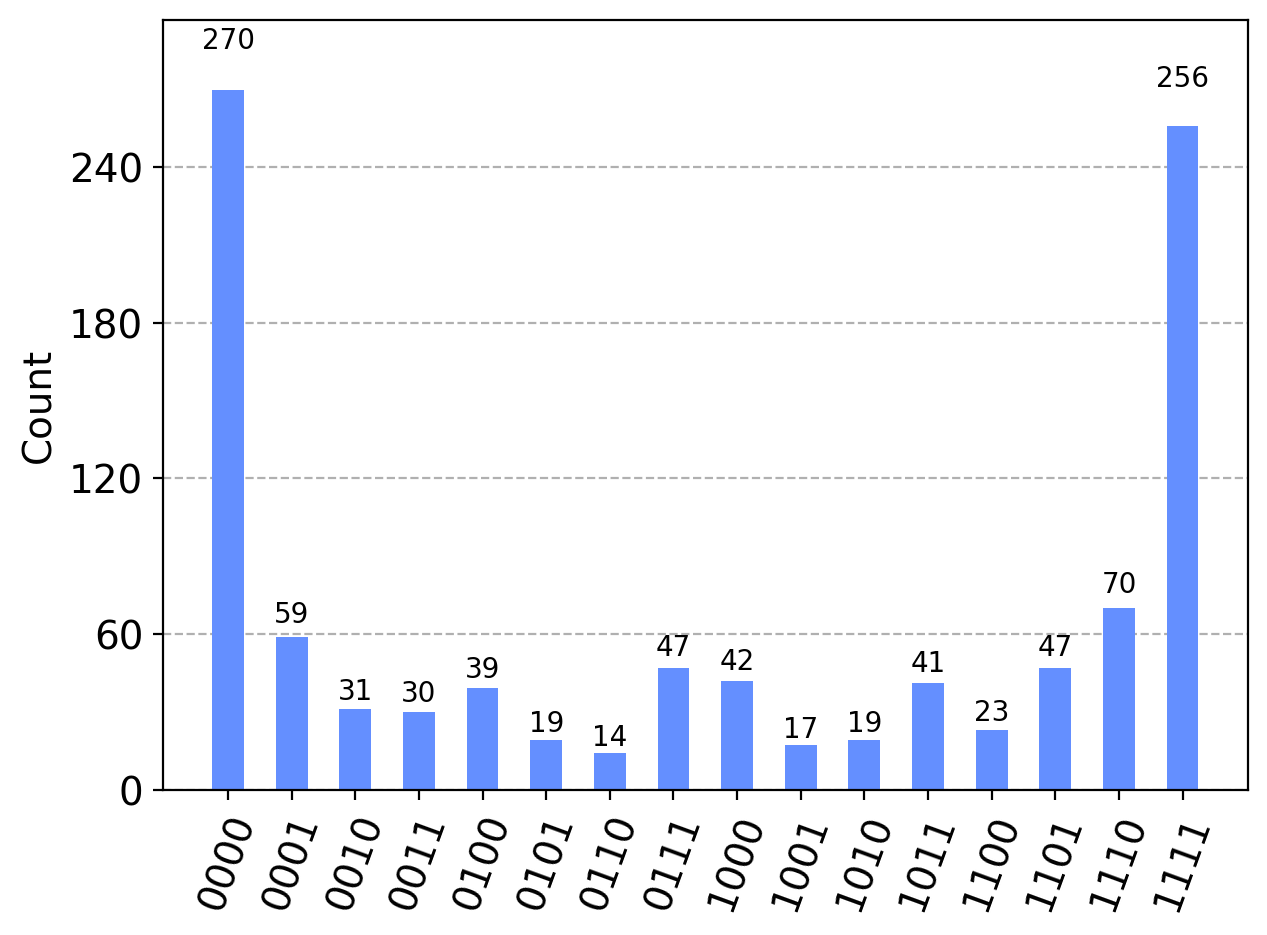

In [16]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(circ)
 
# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_bit_flip)